In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 2.1

In [6]:
import random
random.seed(1)

max_num_tasks = 2000
num_arms = 10 #n
num_plays = 1000

In [4]:
Q_star = np.random.normal(0, 1, (max_num_tasks, num_arms))

In [5]:
# Exercise 2.1

epsilon = [0, 0.1, 0.01]
all_rewards = np.zeros((len(epsilon), num_plays, max_num_tasks))
is_best_arm = np.zeros((len(epsilon), num_plays, max_num_tasks))
qT = np.zeros((len(epsilon), max_num_tasks, num_arms))
qN = np.zeros((len(epsilon), max_num_tasks, num_arms))
qS = np.zeros((len(epsilon), max_num_tasks, num_arms))

for idx_e in range(len(epsilon)):
    e = epsilon[idx_e]
    print(e)
    for idx_play in range(num_plays):
        for idx_task in range(max_num_tasks):
            best_arm = np.argmax(Q_star[idx_task, :])
            if (np.random.uniform(0, 1) < e):
                arm = np.random.randint(low=0, high=num_arms, size=1)
            else:
                arm = np.argmax(qT[idx_e, idx_task, :], axis=0)
                
            if arm == best_arm:
                is_best_arm[idx_e, idx_play, idx_task] = 1
            
            current_reward = np.random.normal(Q_star[idx_task, arm], 1)
            all_rewards[idx_e, idx_play, idx_task] = current_reward
            qS[idx_e, idx_task, arm] = qS[idx_e, idx_task, arm] + current_reward
            qN[idx_e, idx_task, arm] = qN[idx_e, idx_task, arm] + 1
            qT[idx_e, idx_task, arm] = qS[idx_e, idx_task, arm] / qN[idx_e, idx_task, arm]


0
0.1
0.01


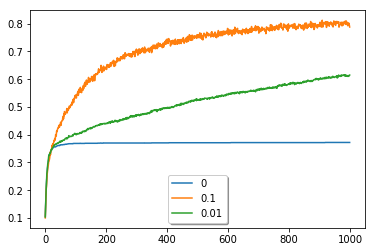

In [6]:
fig, ax = plt.subplots()

for idx_e, e in enumerate(epsilon): 
    ax.plot(np.mean(is_best_arm[idx_e, :, :], axis=1), label=e)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

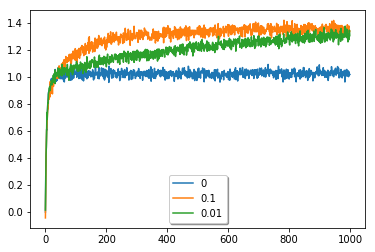

In [7]:
fig, ax = plt.subplots()

for idx_e, e in enumerate(epsilon): 
    ax.plot(range(num_plays), np.mean(all_rewards[idx_e, :, :], axis=1), label=e)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

It looks like when epsilon=0.1 performs best in the long run in terms of the cumulative reward and cumulative probability of selecting the best action. 

## Exercise 2.2

In [8]:
tau = [0.05, 0.1, 0.15]
all_rewards = np.zeros((len(tau), num_plays, max_num_tasks))
is_best_arm = np.zeros((len(tau), num_plays, max_num_tasks))

qT = np.zeros((len(tau), max_num_tasks, num_arms))
qN = np.zeros((len(tau), max_num_tasks, num_arms))
qS = np.zeros((len(tau), max_num_tasks, num_arms))

def softmax_explore(qT, tau):
    exp_qt = np.exp(qT/tau)
    return exp_qt / exp_qt.sum()

for idx_t, t in enumerate(tau):
    print(t)
    for idx_play in range(num_plays):
        for idx_task in range(max_num_tasks):
            best_arm = np.argmax(Q_star[idx_task, :])

            softmax_prob = softmax_explore(qT[idx_t, idx_task, :], t)
            arm = np.random.choice(np.arange(0, num_arms), p=softmax_prob)
                
            if arm == best_arm:
                is_best_arm[idx_t, idx_play, idx_task] = 1
            
            current_reward = np.random.normal(Q_star[idx_task, arm], 1)
            all_rewards[idx_t, idx_play, idx_task] = current_reward
            qS[idx_t, idx_task, arm] = qS[idx_t, idx_task, arm] + current_reward
            qN[idx_t, idx_task, arm] = qN[idx_t, idx_task, arm] + 1
            qT[idx_t, idx_task, arm] = qS[idx_t, idx_task, arm] / qN[idx_t, idx_task, arm]


0.05
0.1
0.15


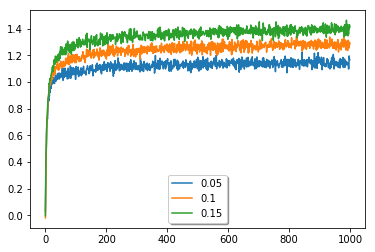

In [9]:
fig, ax = plt.subplots()

for idx_t, t in enumerate(tau): 
    ax.plot(range(num_plays), np.mean(all_rewards[idx_t, :, :], axis=1), label=t)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

(1000,)


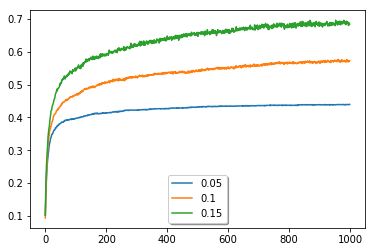

In [10]:
# Percent picked the correct action

fig, ax = plt.subplots()
print(np.mean(is_best_arm[0, :, :], axis=1).shape)
for idx_t, t in enumerate(tau):
    ax.plot(range(num_plays), np.mean(is_best_arm[idx_t, :, :], axis=1), label=t)
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

## Exericse 2.5

In [11]:
Q_star = np.random.normal(0, 1, (max_num_tasks+1, num_arms))
all_rewards = np.zeros((num_plays, max_num_tasks))
is_best_arm = np.zeros((num_plays, max_num_tasks))

qT = np.zeros((max_num_tasks, num_arms))
qT_old = np.zeros((max_num_tasks, num_arms))
qN = np.zeros((max_num_tasks, num_arms))
qS = np.zeros((max_num_tasks, num_arms))


for idx_play in range(num_plays):
    for idx_task in range(0, max_num_tasks-1):
        best_arm = np.argmax(Q_star[idx_task, :])
        if (np.random.uniform(0, 1) < 0.1):
            arm = np.random.randint(low=0, high=num_arms, size=1)
        else:
            arm = np.argmax(qT[idx_task, :], axis=0)
        if arm == best_arm:
            is_best_arm[idx_play, idx_task] = 1

        current_reward = np.random.normal(Q_star[idx_task, arm], 1)
        all_rewards[idx_play, idx_task] = current_reward
        qK = qT[idx_task, arm]
        qN[idx_task, arm] = qN[idx_task, arm] + 1
        qT[idx_task, arm] = qK + (1/qN[idx_task, arm]) * (current_reward - qK)
        # Note: the k here is still how many times it was selected, instead of just the idx_tasks

        qS[idx_task, arm] = qS[idx_task, arm] + current_reward
        qT_old[idx_task, arm] = qS[idx_task, arm] / qN[idx_task, arm]


In [12]:
print(qT_old.shape)
np.allclose(qT_old, qT)

(2000, 10)


True

## Non-Stationary Problems

In [2]:
from tensorflow.python.client import device_lib

def get_available_devices():  
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())  

['/device:CPU:0']


## Exercise 2.7

Q in this case is taking random walk, the walk steps are getting bigger and bigger due to the increasing sigma.
We are calculating rewards (simple avg) together with rewards (exp_avg). It seemed like with bigger sigma, the exporential average approach is better. This intuitively makes sense because with a nonstationary problem the most recently episode should be weighed more.


In [ ]:
num_plays = 2000
for i in range(max_num_tasks+1):  
    Q_star[i, :] = np.random.normal(0, 1, 10)
    
ns_sigs = [0.1, 0.5, 1]

all_rewards = np.zeros((len(ns_sigs), num_plays, max_num_tasks))
all_rewards_exp_avg = np.zeros((len(ns_sigs), num_plays, max_num_tasks))

is_best_arm = np.zeros((len(ns_sigs), num_plays, max_num_tasks))
is_best_arm_exp = np.zeros((len(ns_sigs), num_plays, max_num_tasks))

qT = np.zeros((max_num_tasks, num_arms))
qT_exp_avg = np.zeros((max_num_tasks, num_arms))
qN = np.zeros((max_num_tasks, num_arms))
qS = np.zeros((max_num_tasks, num_arms))

for sig_index in range(len(ns_sigs)):
    for idx_play in range(num_plays):
        for idx_task in range(0, max_num_tasks-1):
            # random walk to illustrate non-stationary
            Q_star[idx_task, :] += np.random.normal(0, ns_sigs[sig_index], num_arms)
            
            best_arm = np.argmax(Q_star[idx_task, :])
            if (np.random.uniform(0, 1) <= 0.1):
                arm = np.random.randint(low=0, high=num_arms, size=1)
                arm_exp_avg = np.random.randint(low=0, high=num_arms, size=1)
            else:
                arm = np.argmax(qT[idx_task, :], axis=0)
                arm_exp_avg = np.argmax(qT_exp_avg[idx_task, :], axis=0)

            if arm == best_arm:
                is_best_arm[sig_index, idx_play, idx_task] = 1
            
            noise = np.random.normal(0, 1)
            current_reward = Q_star[idx_task, arm]+noise
            current_reward_exp_avg = Q_star[idx_task, arm_exp_avg]+noise

            all_rewards[sig_index, idx_play, idx_task] = current_reward
            all_rewards_exp_avg[sig_index, idx_play, idx_task] = current_reward_exp_avg
            
            # simple avg
            qK = qT[idx_task, arm]
            qN[idx_task, arm] = qN[idx_task, arm] + 1
            qT[idx_task, arm] = qK + (1/qN[idx_task, arm]) * (current_reward - qK)

            # exponential avg
            qK_exp_avg = qT_exp_avg[idx_task, arm_exp_avg]
            qT_exp_avg[idx_task, arm_exp_avg] = qK_exp_avg + 0.1*(current_reward_exp_avg - qK_exp_avg)

In [ ]:
fig, ax = plt.subplots()

for idx in range(len(ns_sigs)):
    ax.plot(range(num_plays), np.mean(all_rewards[idx, :, :], axis=1), label="sim_avg: "+str(ns_sigs[idx]))
    ax.plot(range(num_plays), np.mean(all_rewards_exp_avg[idx, :, :], axis=1), label="exp_avg: "+str(ns_sigs[idx]))
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()

## Exercise 2.11

In [ ]:
Reinforcement Comparison.

In [39]:
# epsilon is the probability of choosing a random arm
alpha = 0.1
non_stationary_sigma = [0.1, .5, 1]
esp = 0.1

num_plays = 2000
all_rewards = np.zeros((len(non_stationary_sigma), max_num_tasks, num_plays))
picked_max_action = np.zeros((len(non_stationary_sigma), max_num_tasks, num_plays))

all_rewards_exp_avg = np.zeros((len(non_stationary_sigma), max_num_tasks, num_plays))
picked_max_action_exp_avg = np.zeros((len(non_stationary_sigma), max_num_tasks, num_plays))

for eps_idx, ns_sig in enumerate(non_stationary_sigma):
    qT = np.zeros(Q_star.shape)
    qT_exp_avg = np.zeros(Q_star.shape)
    qN = np.zeros( (max_num_tasks, num_arms) )
    qN_exp_avg = np.zeros( (max_num_tasks, num_arms) )
    for b in range(max_num_tasks):
        for p in range(num_plays):
            
            # Include non-stationarity in Q_star,
            # each arm takes a random walk, with N(0, ns_sig)
            Q_star[b, :] += np.random.normal(0, ns_sig, 10)
            best_arm = np.argmax(Q_star[b, :])
            
            if np.random.uniform(0, 1) <= 0.1:
                # pick a random arm
                arm = np.random.randint(0, num_arms)
                arm_exp_avg = np.random.randint(0, num_arms)
            else:
                # pick greedy arm
                arm = np.argmax(qT[b, :])
                arm_exp_avg = np.argmax(qT_exp_avg[b, :])
            
            # determine if arm selected is the best possible
            if arm == best_arm:
                picked_max_action[eps_idx, b, p] = 1
                
            if arm_exp_avg == best_arm:
                picked_max_action_exp_avg[eps_idx, b, p] = 1
                
            # Insert some noise in the reward
            noise = np.random.normal(0, 1)
            reward = Q_star[b, arm] + noise
            reward_exp_avg = Q_star[b, arm_exp_avg] + noise
            
            # Update step
            all_rewards[eps_idx, b, p] = reward
            qN[b, arm] = qN[b, arm] + 1
            qT[b, arm] = qT[b, arm] + (1 / qN[b, arm]) * (reward - qT[b, arm])
            
            all_rewards_exp_avg[eps_idx, b, p] = reward_exp_avg
            qN_exp_avg[b, arm_exp_avg] = qN_exp_avg[b, arm_exp_avg] + 1
            qT_exp_avg[b, arm_exp_avg] = qT_exp_avg[b, arm_exp_avg] + (alpha) * (reward_exp_avg - qT_exp_avg[b, arm_exp_avg])

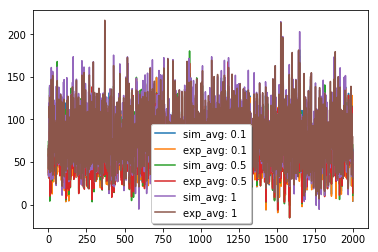

In [40]:
fig, ax = plt.subplots()

for idx in range(len(ns_sigs)):
    ax.plot(range(num_plays), np.mean(all_rewards[idx, :, :], axis=1), label="sim_avg: "+str(ns_sigs[idx]))
    ax.plot(range(num_plays), np.mean(all_rewards_exp_avg[idx, :, :], axis=1), label="exp_avg: "+str(ns_sigs[idx]))
    
legend = ax.legend(loc='lower center', shadow=True)
plt.show()